## Hypothesis Testing Examples using Insurance Dataset

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format


In [2]:
insurance =pd.read_csv('insurance.csv')

In [3]:
insurance.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [18]:
female = insurance[insurance['sex'] == 'female']
male = insurance[insurance['sex'] == 'male']

In [50]:
stats.normaltest(female['bmi'])

NormaltestResult(statistic=8.702256368506658, pvalue=0.012892259528571495)

- H0: Normally distributed
- H1: Not Normally Distributed
- alpha = 0.05

To conlcude, 0.01 < 0.05, we reject the null hypothesis, male age is not normally distributed.

In [27]:
stats.normaltest(female['bmi'])

NormaltestResult(statistic=8.702256368506658, pvalue=0.012892259528571495)

- H0: Normally distributed
- H1:  Not Normally Distributed
- alpha = 0.05

To conclude, 0.01 < 0.05, we reject the null hypothesis, female age is not normally distributed.

<ipython-input-44-ce6bd94a7168>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


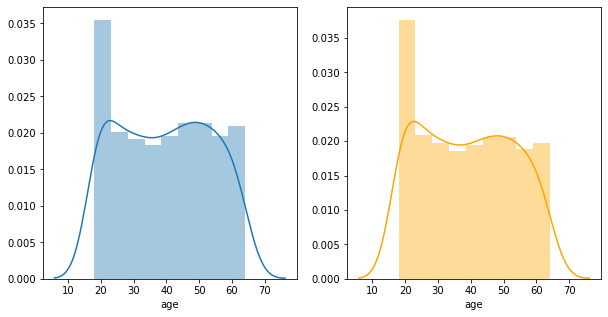

In [44]:
# To check, we can plot a distribution plot.
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(female['age'], ax = ax[0])
sns.distplot(male['age'], ax = ax[1], color = 'orange')
fig.show()

In [54]:
smokers = insurance[insurance['smoker'] == 'yes']
non_smokers = insurance[insurance['smoker'] == 'no']

<ipython-input-55-f5651c8f7778>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


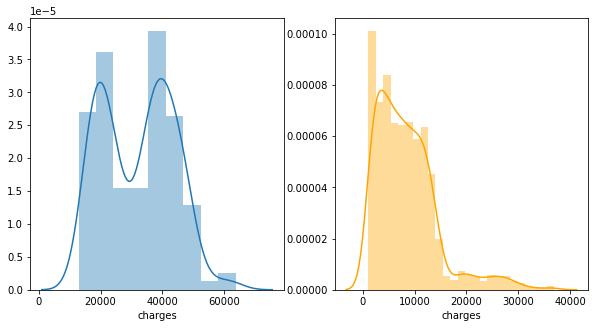

In [55]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.distplot(smokers['charges'], ax = ax[0])
sns.distplot(non_smokers['charges'], ax = ax[1], color = 'orange')
fig.show()

From the distribution plots we can tell that neither charges for females and males are normally distributed. We can tell from  the plots that non-smokers tend to be charged less compared to smokers. 

Testing whether or not charges from different regions for non-smokers and smokers differ in mean. First we will need to check the distributions as well as the variances of each to determine whether or not we should stick with a regular ttest or use the Mann Whitney Wilcoxon test.

In [61]:
southeast_smokers = smokers[smokers['region'] == 'southeast']['charges']
southeast_non_smokers = non_smokers[non_smokers['region'] == 'southeast']['charges']

print(stats.normaltest(southeast_smokers))
print(stats.normaltest(southeast_non_smokers))


NormaltestResult(statistic=4.785488877980518, pvalue=0.0913785565598305)
NormaltestResult(statistic=85.22034472803975, pvalue=3.123469498907502e-19)


In [70]:
#testing equality of variance with Bartlett test.
stat, p_val = stats.bartlett(southeast_smokers,southeast_non_smokers)
p_val

1.454342728640446e-14

- pval for smokers is 0.09 >0.05 which we fail to reject null. Smokers in southeast region come from a normal distribution.
- pval for non-smokers is < 0.05 which we reject the null hypothesis. non-smokers in southeast region do not come from a normal distribution.
- pval for bartlett test is < 0.05, we reject the null hypothesis. Variances are not equal.

<ipython-input-64-529eeb0acc03>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


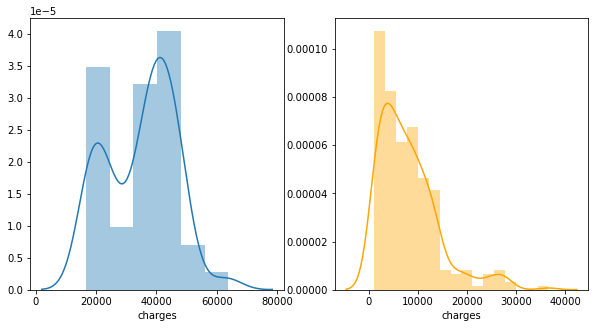

In [64]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.distplot(southeast_smokers, ax = ax[0])
sns.distplot(southeast_non_smokers, ax = ax[1], color = 'orange')

fig.show()

Because one of the distributions does not come from a normal distribution, we will have to resort to nonparametric testing using the Mann Whitney test

# Mann Whitney Test

- H0: Means are equal.
- H1: Means are not equal.

In [66]:
stat, pval = stats.mannwhitneyu(southeast_smokers, southeast_non_smokers, alternative = 'two-sided')
pval

4.670012458585334e-43

pval < 0.05, reject the null. The average charges are not equal between southeast smokers and southeast non-smokers. This makes sense because from the looks of the distribution charts, non-smokers tend to be charged less than smokers.

Of course we can do testing on northwest and northeast data to determine whether or not smokers and non-smokers differe in average charges, but that is for another day.

# Kruskal Wallis Test VS One Way Anova
In this section we will determine whether or not we should use kruskal wallis or one way anova on the BMI per region. We will first need to test for normality between the regions.

In [71]:
southeast = insurance[insurance['region'] =='southeast']['bmi']
southwest = insurance[insurance['region'] == 'southwest']['bmi']
northwest = insurance[insurance['region'] == 'northwest']['bmi']
northeast = insurance[insurance['region'] == 'northeast']['bmi']

In [72]:
print(stats.normaltest(southeast))
print(stats.normaltest(southwest))
print(stats.normaltest(northwest))
print(stats.normaltest(northeast))

NormaltestResult(statistic=4.6166945625351445, pvalue=0.09942543812923942)
NormaltestResult(statistic=1.5610172823787771, pvalue=0.45817290641481057)
NormaltestResult(statistic=1.5192955665611054, pvalue=0.4678311759565901)
NormaltestResult(statistic=4.178353178494429, pvalue=0.12378902307684393)


All pval > 0.05, we fail to reject the null. All regions come from a normal distribution.

<ipython-input-74-da9a25dd78e7>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


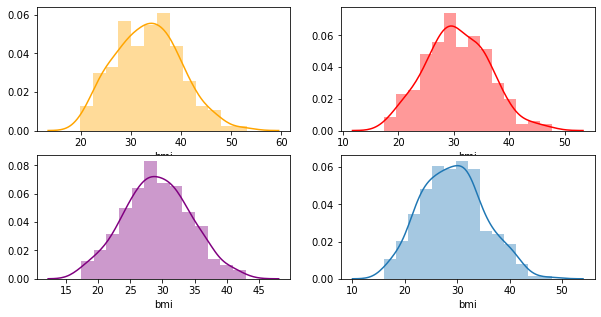

In [74]:
fig, ax = plt.subplots(2,2, figsize = (10,5))

sns.distplot(southeast, ax = ax[0,0], color = 'orange')
sns.distplot(southwest, ax = ax[0,1], color = 'red')
sns.distplot(northwest, ax = ax[1,0], color = 'purple')
sns.distplot(northeast, ax = ax[1,1])

fig.show()

Since all regions BMI come from a normal distribtion, we will use the one way anova technique.

- H0: Means of the BMI are the same.
- H1: Means of the BMI are not the same.

In [76]:
model = smf.ols('bmi~C(region)', data = insurance).fit()
aov_table = anova_lm(model, typ = 2)
print(aov_table)

            sum_sq      df     F  PR(>F)
C(region)  4055.88    3.00 39.50    0.00
Residual  45664.32 1334.00   nan     nan


pval < 0.05, we reject the null hypothesis. The means of the BMI per region are not the same.

# Chi Squared Test of Independence

In [9]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(insurance['sex'],insurance['region'], values = insurance['bmi'], aggfunc = sum)
contingency

region,northeast,northwest,southeast,southwest
sex,,,,
female,4721.215,4801.585,5717.47,4869.8
male,4731.000,4688.345,6424.11,5074.1


In [10]:
chi2, p ,dof, expected = chi2_contingency(contingency)
p

9.344836684300926e-07

- H0: independent
- H1: not independent
- alpha = 0.05

To conclude, sex and region are not independent of each other. BMI is different by sex in different regions.